In [36]:
import pandas as pd
import preprocessor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 假设你已经将CSV数据加载到Pandas DataFrame中
# 例如：df = pd.read_csv('30-70cancerChdEtc.csv')


# 指定CSV文件的路径
csv_file_path = '30-70cancerChdEtc.csv'

# 使用Pandas的read_csv函数加载数据
df = pd.read_csv(csv_file_path)

# 显示数据集的前几行以了解其结构
print(df.head())

# 显示数据集的基本信息，包括每列的数据类型和非空值的数量
print(df.info())

# 显示数据集的描述性统计信息
print(df.describe())

# 检查数据集中是否有缺失值
print(df.isnull().sum())

# 如果CSV文件包含中文或特殊字符，可能需要指定编码格式
# df = pd.read_csv(csv_file_path, encoding='utf-8')  # 例如，使用UTF-8编码

# 如果CSV文件中列名或数据存在引号，可能需要指定引号参数
# df = pd.read_csv(csv_file_path, quotechar='"')  # 例如，使用双引号作为引号字符

# 如果CSV文件中列之间不是用逗号分隔的，可能需要指定分隔符
# df = pd.read_csv(csv_file_path, sep=';')  # 例如，使用分号作为分隔符

# 显示数据集的前几行以了解其结构
print(df.head())

      Location  Period                                          Indicator  \
0  Afghanistan    2016  Probability (%) of dying between age 30 and ex...   
1  Afghanistan    2016  Probability (%) of dying between age 30 and ex...   
2  Afghanistan    2016  Probability (%) of dying between age 30 and ex...   
3  Afghanistan    2015  Probability (%) of dying between age 30 and ex...   
4  Afghanistan    2015  Probability (%) of dying between age 30 and ex...   

         Dim1  First Tooltip  
0  Both sexes           29.8  
1        Male           31.8  
2      Female           27.7  
3  Both sexes           29.8  
4        Male           31.9  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2745 non-null   object 
 1   Period         2745 non-null   int64  
 2   Indicator      2745 non-null   object 
 3   Dim1           2745 

In [37]:

# 数据预处理


# 选择特征和目标变量
features = ['Dim1', 'Period']  # 假设Gender是分类特征，Year是数值特征
target = 'First Tooltip'

# 将数据集分为特征集和目标变量
X = df[features]
y = df[target]

# 正确划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 检查划分后的数据集大小
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 确保特征和目标变量选择正确
print(X.head())
print(y.head())

(1921, 2) (1921,)
(824, 2) (824,)
         Dim1  Period
0  Both sexes    2016
1        Male    2016
2      Female    2016
3  Both sexes    2015
4        Male    2015
0    29.8
1    31.8
2    27.7
3    29.8
4    31.9
Name: First Tooltip, dtype: float64


In [38]:
# 检查并处理缺失值
if X.isnull().any().any():
    X = X.dropna()  # 删除含有缺失值的行
    y = y.loc[X.index]  # 确保y与X的索引对应

# 或者，填充缺失值
# X.fillna(X.mean(), inplace=True)
# y.fillna(y.mean(), inplace=True)

In [39]:
# 重新加载CSV文件
df = pd.read_csv(csv_file_path)

# 检查列名
print(df.columns)

# 选择特征和目标变量
features = ['Dim1', 'Period']  # 假设Dim1是分类特征，Period是数值特征
target = 'First Tooltip'

# 将数据集分为特征集和目标变量
X = df[features]
y = df[target]

# 检查特征集和目标变量的样本数量是否一致
print(X.shape, y.shape)

# 正确划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 检查划分后的数据集大小
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 创建预处理管道
categorical_features = ['Dim1']
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # 保持其他特征不变
)

# 创建随机森林回归模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 创建完整的管道，包括预处理和模型
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', rf)])

# 训练模型
pipeline.fit(X_train, y_train)

# 进行预测
y_pred = pipeline.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)  # 确保使用y_test而不是y
r2 = r2_score(y_test, y_pred)  # 确保使用y_test而不是y

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# 特征重要性
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
feature_importances = pipeline.named_steps['model'].feature_importances_

print("Feature importances:")
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance}")
    

Index(['Location', 'Period', 'Indicator', 'Dim1', 'First Tooltip'], dtype='object')
(2745, 2) (2745,)
(1921, 2) (1921,)
(824, 2) (824,)
Mean Squared Error (MSE): 40.77344642226098
R-squared (R²): 0.15827704485063443
Feature importances:
cat__Dim1_Both sexes: 0.07238667379386328
cat__Dim1_Female: 0.16907333638734254
cat__Dim1_Male: 0.480248442550704
remainder__Period: 0.27829154726809013


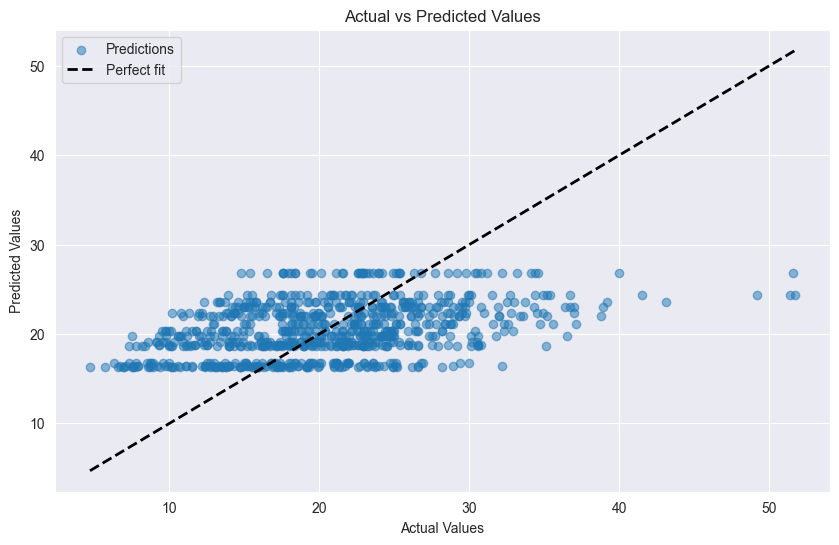

In [40]:
import matplotlib.pyplot as plt

# 确保预测值和实际值的样本数量一致
y_pred = pipeline.predict(X_test)  # 重新预测测试集以确保与y_test对齐

# 绘制实际值与预测值的对比图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

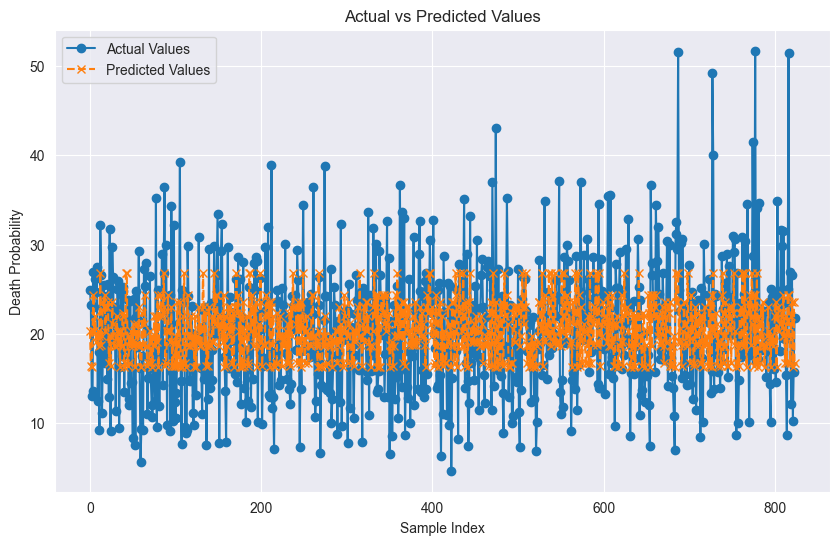

In [42]:
import matplotlib.pyplot as plt

# 确保预测值和实际值的样本数量一致
y_pred = pipeline.predict(X_test)  # 重新预测测试集以确保与y_test对齐

# 绘制实际值与预测值的折线图
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Values', marker='o')  # 使用range生成索引
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values', linestyle='--', marker='x')

plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Death Probability')
plt.legend()
plt.grid(True)
plt.show()